# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
from scipy import stats 
import numpy as np

In [2]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [3]:
# Considering the sample has a standard distribution
statistics1, pvalue1 =  stats.ttest_1samp(GPU1, 0)

In [4]:
print(statistics1, pvalue1, pvalue1 * 100)

34.056241516158195 7.228892044970457e-15 7.228892044970457e-13


# Conclusion
- The pvalue for the GPU1 is 7.228892044970457e-15 (or) 7.228892044970457e-13 and this value is less than 5% of the Significant Value.
- Based on the result I'm rejecting the Null Hypothesis, hence the Alternate Hypothesis is proved.

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [5]:
statistics2,pvalue2 = stats.ttest_ind(GPU1, GPU2)

In [6]:
print(statistics2, pvalue2, pvalue2 * 100)

-2.627629513471839 0.013794282041452725 1.3794282041452726


# Conclusion
- The pvalue (probability) comparing the GPU1 and GPU2 is 0.013794282041452725 (or) 1.3794282041452726 and the value is less then 5% of the Significant Value.
- Based on the result I'm rejecting the Null Hypothesis, hence the Alternate Hypothesis is proved.

## Question 3

He is trying a third GPU - GPU3.

In [7]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

# Hypothesis

- Null Hypothesis : There is significant difference between data sets GPU1 and GPU3
- Alternate Hypothesis : There is a no significant difference

In [8]:
statistics3, pvalue3 = stats.ttest_ind(GPU1, GPU3)

In [9]:
print(statistics3,pvalue3,pvalue3 * 100)

-1.4988943759093303 0.14509210993138993 14.509210993138993


In [10]:
# Cross Validation
u,pvalue4 = stats.mannwhitneyu(GPU1, GPU3)
print(u,pvalue4)
print(pvalue4 * 100)

79.0 0.08037248132236419
8.037248132236419


# Conclusion

- The pvalue or the probability is 0.14509210993138993 (or) 14.509210993138993 and the value lies within the region of non rejection.
- The hypothesis testing validates that null hypothesis is true, by which we conclude that there is a significance difference between GPU1 and GPU3.

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [11]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [12]:
statistics5, pvalue5 = stats.levene(e1,e2,e3)
print(statistics5, pvalue5, pvalue5*100)

2.6741725711150446 0.12259792666001798 12.259792666001799


# Conclusion
- On subjecting the samples to levene test we are getting pvalue or probability of 0.013794282041452725 (or) 1.3794282041452726.
- The received values states that the null hypothesis defined is worng and the same is rejected hence proving the alternate hypothesis that the population does not have equal variances.

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [13]:
statistics6, pvalue6 = stats.f_oneway(e1,e2,e3)
print(statistics6, pvalue6, pvalue6*100)

2.51357622845924 0.13574644501798466 13.574644501798467


In [14]:
print("Mean of e1 {}.".format(e1.mean()))
print("Mean of e2 {}.".format(e2.mean()))
print("Mean of e3 {}.".format(e3.mean()))

Mean of e1 0.7537925.
Mean of e2 1.69759475.
Mean of e3 0.7444685.


# Conclusion
- The Null hypothesis states that two or more groups have the same population mean.
- The Null hypothesis is tested using stats.f_oneway() function.
- The one way ANOVA test is an omnibus test statistic and cannot tell you which specific groups were statistically significantly different from each other, only that at least two groups were.
- The pvalue obtained is 0.13574644501798466 or 13.574644501798467 which confirms the stated Null hypothesis
- However taking the mean of different sample we also confirm that the e1 and e3 samples have significantly closer population mean.

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

# Type I Error:

- The Type-I error is a False Positive error.
- The Type-I error occurs when you incorrectly reject a true null hypothesis, i.e we falsely reject the (true) null hypothesis.
- Eg : A patient's test result shows that the patient is having a disease, when infact the patient does not have that diesase.

# Type II Error:

- The Type-II error is a True Negative error.
- Type II errors happen when we fail to reject a false null hypothesis.
- Eg : A blood test failing to detect the disease it was designed to detect, in a patient who really has the disease.

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


# Hypothesis

- Null Hypothesis : The Mean time to place an order is <= 4.5 minutes.
- Alternate Hypothesis : The Mean time to place an order is > 4.5 minutes.

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [15]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])
dice

array([[ 5,  8,  3,  8],
       [ 9,  6,  8,  5],
       [ 8, 12,  7,  2],
       [ 4, 16,  7,  3],
       [ 3,  9,  6,  5],
       [ 7,  2,  5,  7]])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [16]:
ch2_stat, pvalue, dof, contingency= stats.chi2_contingency(dice)
print(ch2_stat)
print(pvalue * 100)
print(pvalue)
print(dof)
print(contingency)

23.315671914716496
7.766367301496693
0.07766367301496693
15
[[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


# Conclusion
- We have obtained a pvalue of 0.07766367301496693 (or) 7.766367301496693 and we are using the threshold as 0.01.
- Upon concluding on the above statement the Null hypothesis is rejected since we have obtained a pvalue more than 0.01.

## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [17]:
z_scores = stats.zscore(dice)
p_values = stats.norm.sf(abs(z_scores))
print("The Z-Score values :")
print(z_scores)
print("---------------------------------------------------------")
print("The p-value values :")
print(p_values)
print("---------------------------------------------------------")
print("The Mean of computed pvalue is {}.".format(p_values.mean()))

The Z-Score values :
[[-0.46291005 -0.18884739 -1.83711731  1.44115338]
 [ 1.38873015 -0.64208114  1.22474487  0.        ]
 [ 0.9258201   0.7176201   0.61237244 -1.44115338]
 [-0.9258201   1.62408759  0.61237244 -0.96076892]
 [-1.38873015  0.03776948  0.          0.        ]
 [ 0.46291005 -1.54854863 -0.61237244  0.96076892]]
---------------------------------------------------------
The p-value values :
[[0.32171442 0.42510621 0.03309629 0.07477068]
 [0.08245741 0.26041025 0.11033568 0.5       ]
 [0.17726974 0.23649578 0.27014569 0.07477068]
 [0.17726974 0.05217856 0.27014569 0.16833418]
 [0.08245741 0.48493574 0.5        0.5       ]
 [0.32171442 0.06074513 0.27014569 0.16833418]]
---------------------------------------------------------
The Mean of computed pvalue is 0.23428473233691496.


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [30]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

### Hypothesis

- Null Hypothesis : The population mean (before and after) are equal.
- Alternate Hypothesis : The population (before and after) are not equal.

In [34]:
diff = before - after

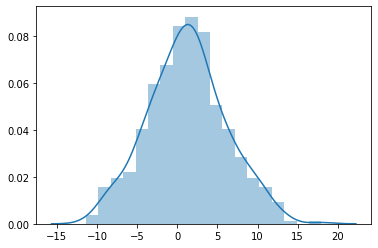

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(diff)

## The dataset provided is of a Normal Distribution

In [36]:
statistics7, pvalue7 = stats.ttest_rel(before, after)
print(statistics7, pvalue7, pvalue7* 100)

5.516987171817168 5.547048461624942e-08 5.547048461624942e-06


# Conclusion

- pvalue that we have obtained is 5.547048461624942e-08.
- Since p < 0.05 the null hypothesis is rejected in support of the alternate hypothesis.
- Hence we conclude that the means of the population from which the samples before and after are drawn are not equal.